In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Heart Diasease
- age
- sex
- chest pain type (4 values)
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by flourosopy
- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
- The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

In [3]:
df = pd.read_csv('heart.csv')

In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.duplicated().sum()

723

In [8]:
hd = df.drop_duplicates()
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [9]:
hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<Axes: >

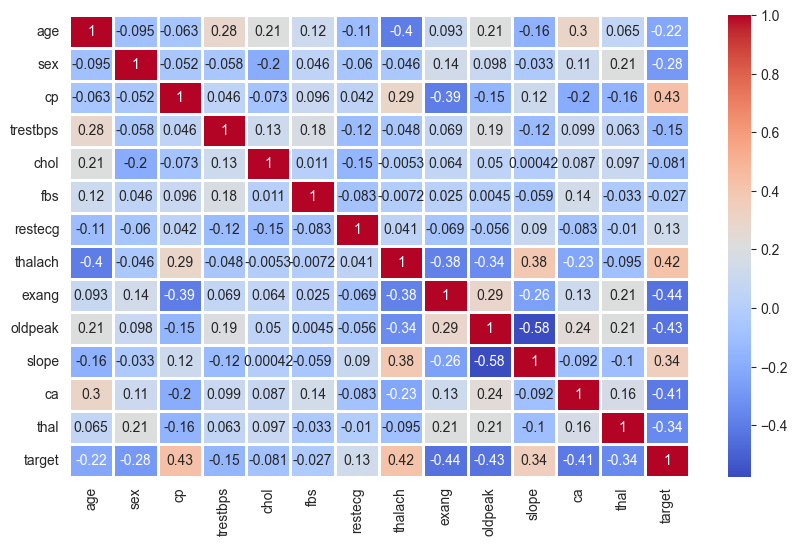

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(hd.corr(), annot=True, cmap='coolwarm', linewidths=2)

Vendo a correlção que tem as variáveis, como temos interesse na variável target, olhamos para ela e podemos ver que ela com o CP e THALACH são as que mais tem relação.

### Separando as informaçoes

Vendo todas as colunas que tem variáveis categóricas e variáveis numerais

In [11]:
for c in hd.columns:
    print(f"{c}: {hd[c].nunique()}")

age: 41
sex: 2
cp: 4
trestbps: 49
chol: 152
fbs: 2
restecg: 3
thalach: 91
exang: 2
oldpeak: 40
slope: 3
ca: 5
thal: 4
target: 2


Podemos ver que as variáveis categóricas são o Sex, CP, FBS, Exang, Slope, CA, Thal

In [12]:
categoricas = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]
numericas = ["age", "trestbps", "chol", "thalach", "oldpeak"]

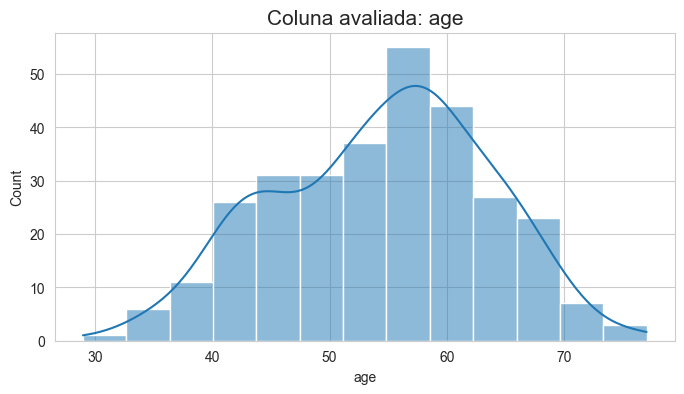

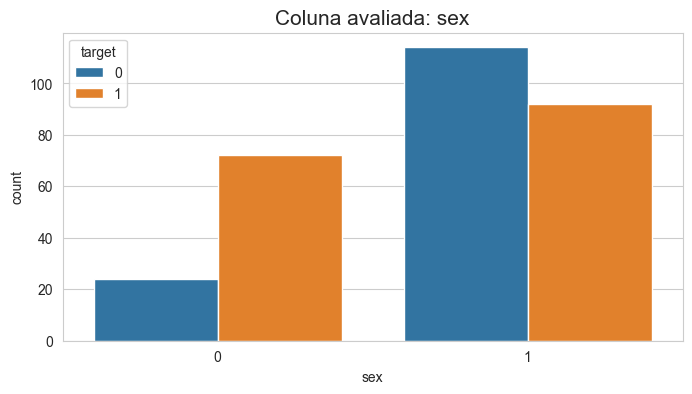

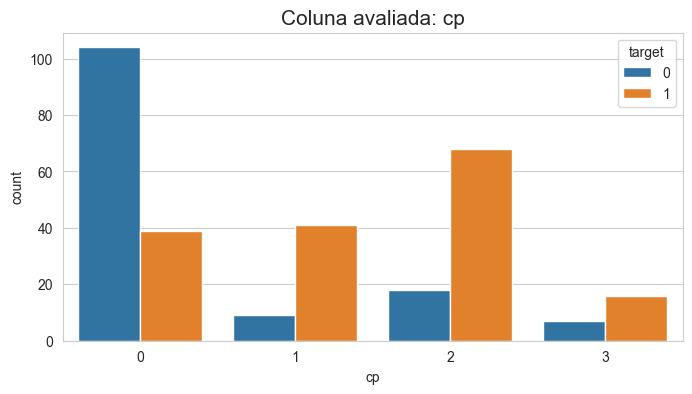

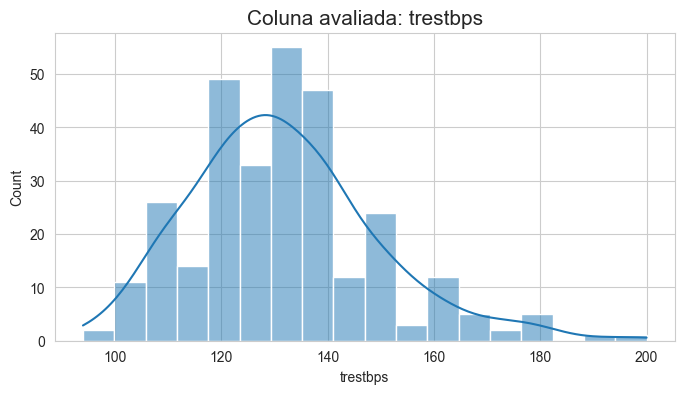

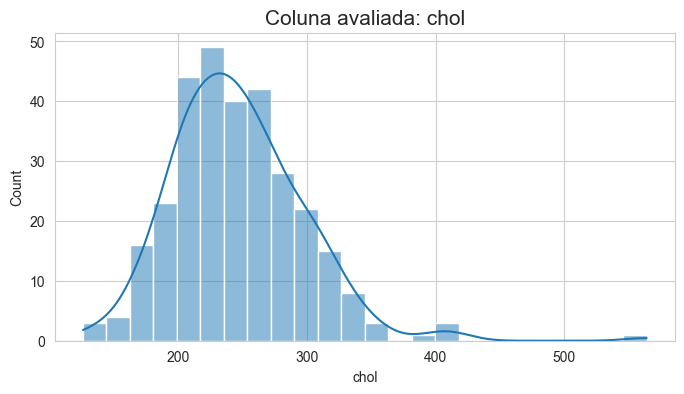

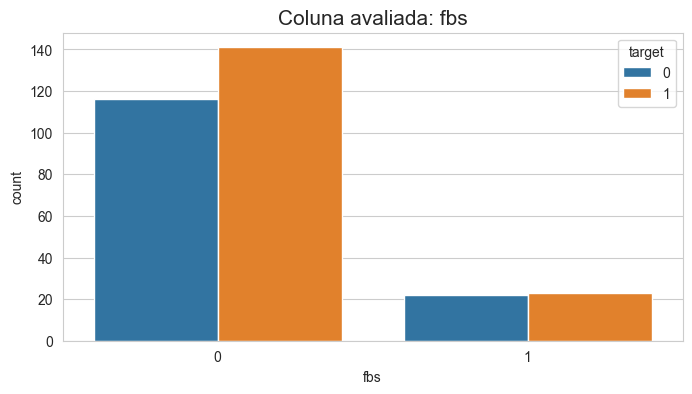

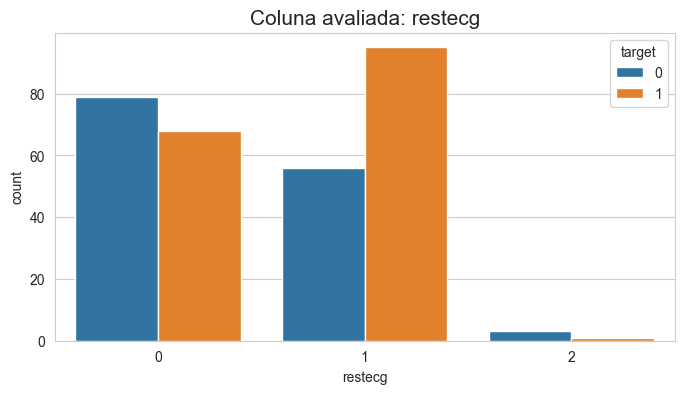

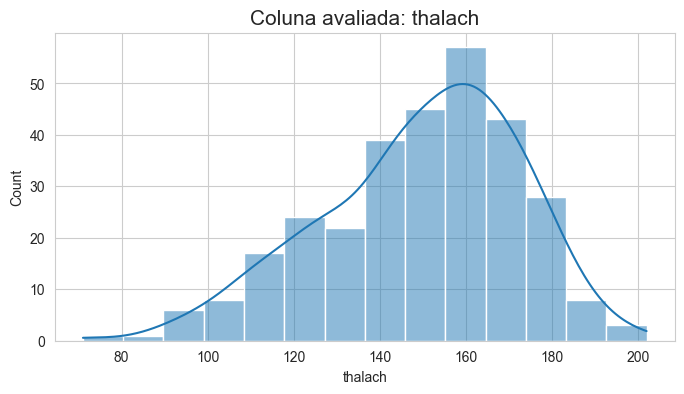

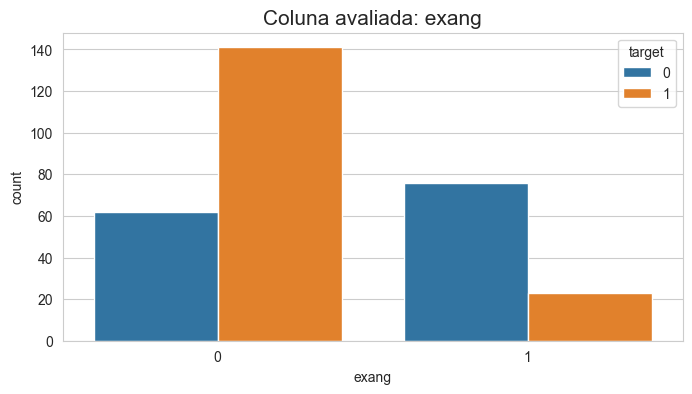

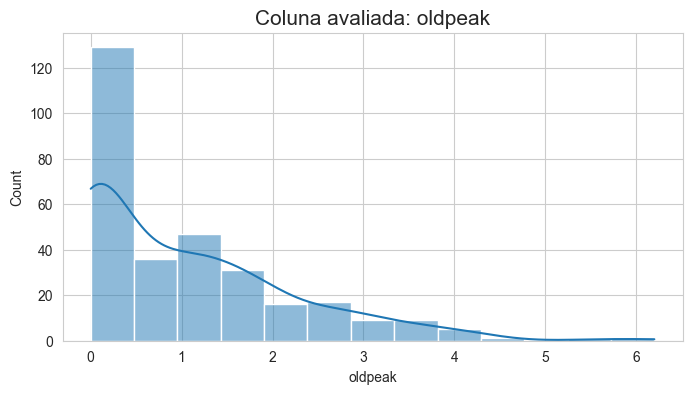

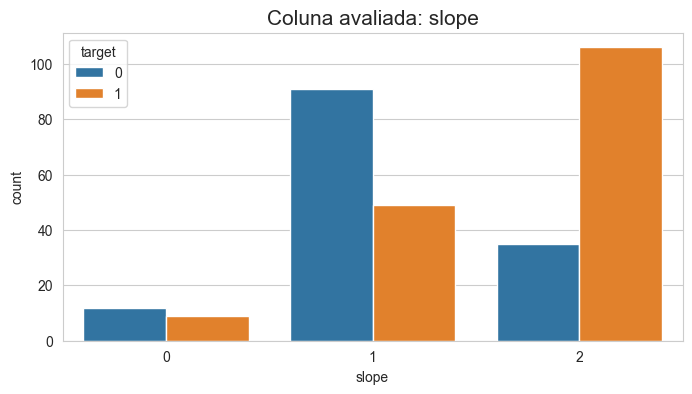

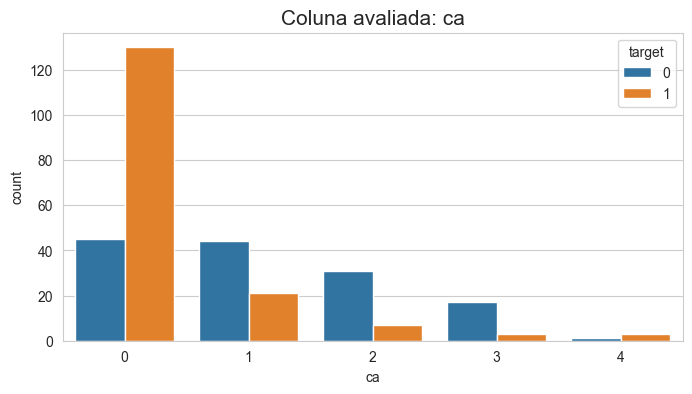

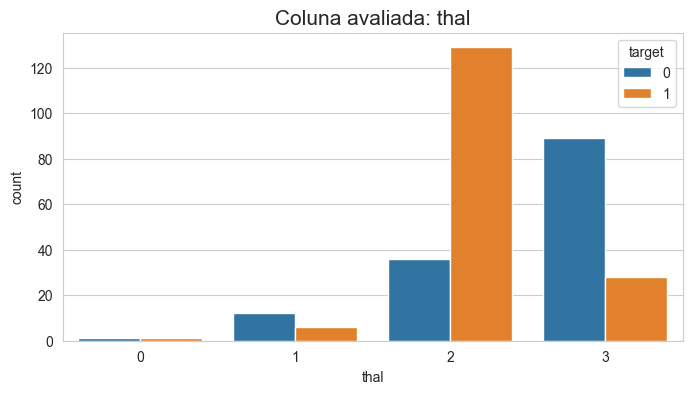

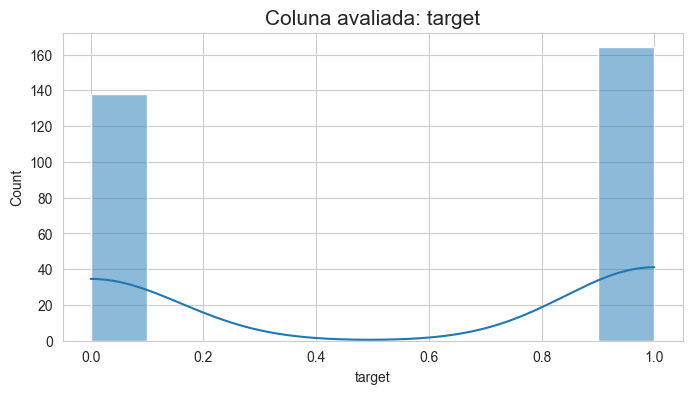

In [13]:
for c in hd.columns:
    plt.figure(figsize=(8, 4))
    plt.title(f"Coluna avaliada: {c}", fontsize=15)
    if c in categoricas:
        sns.countplot(x = hd[c], hue=hd["target"])
    else:
        sns.histplot(hd[c], kde=True)


Nessa aqui a variável target, 0-Não 1-Sim.

# Removendo outliars

Podemos ver ao fazer o describe de HD, que de 25% a 75% temos um range bem homogeneo, ao chegar no Max o valor que temos la é muito maior, logo sabemos por isso a presença de outliers.


In [14]:
hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<Axes: >

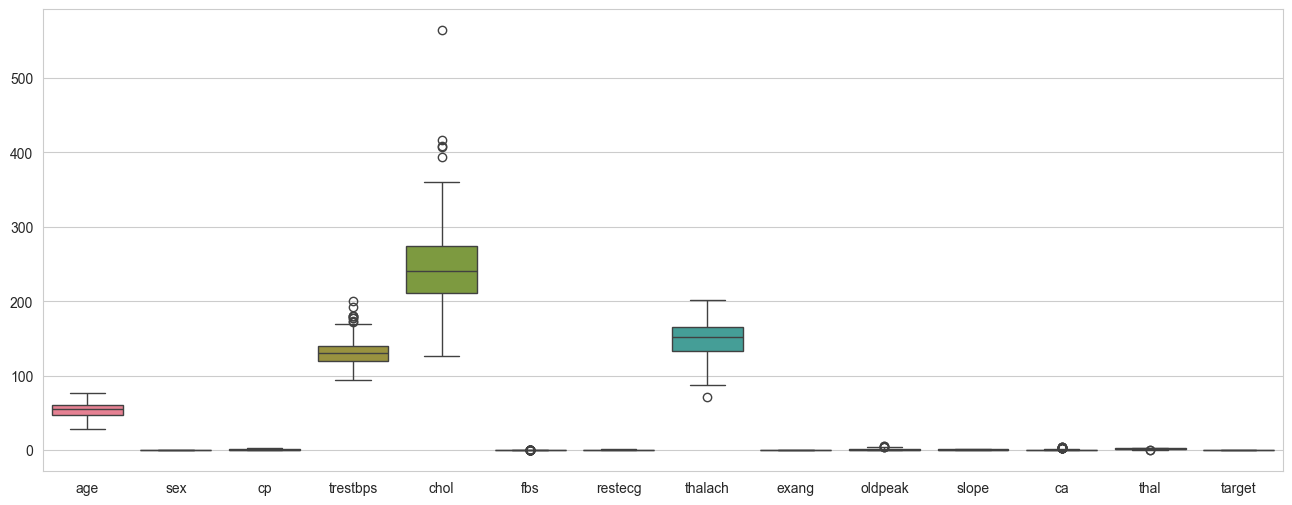

In [15]:
plt.figure(figsize=(16,6))
sns.boxplot(data=hd)

In [16]:
hd['trestbps'].quantile(0.99) ## é para ver se tem algum outlier retirando 1% dos dados

180.0

In [17]:
hd1 = hd[hd['trestbps'] < hd['trestbps'].quantile(0.99)]

<Axes: >

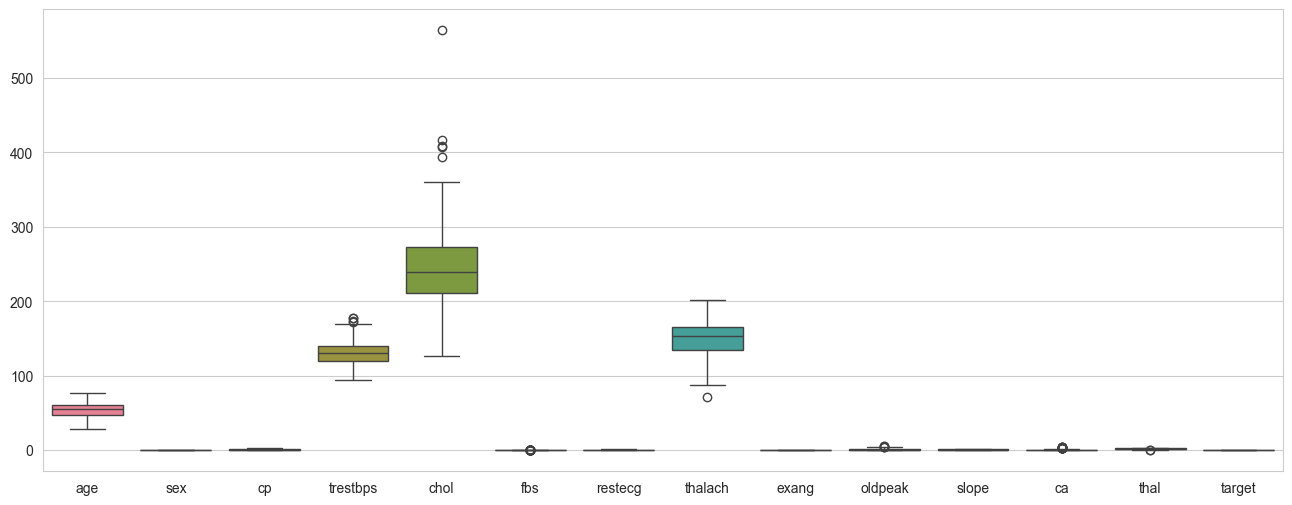

In [18]:
plt.figure(figsize=(16,6))
sns.boxplot(data=hd1)

In [19]:
hd1.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.336700,0.686869,0.969697,130.680135,245.609428,0.144781,0.525253,149.565657,0.319865,1.030303,1.400673,0.720539,2.309764,0.548822
std,9.071847,0.464550,1.034420,16.154304,51.645776,0.352474,0.520072,22.844729,0.467211,1.146686,0.613254,1.009758,0.613755,0.498451
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,134.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,273.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,178.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [20]:
hd1['chol'].quantile(0.98) ## é para ver se tem algum outlier retirando 1% dos dados

354.4799999999999

In [21]:
hd2 = hd1[hd1['chol'] < hd1['chol'].quantile(0.98)]

<Axes: >

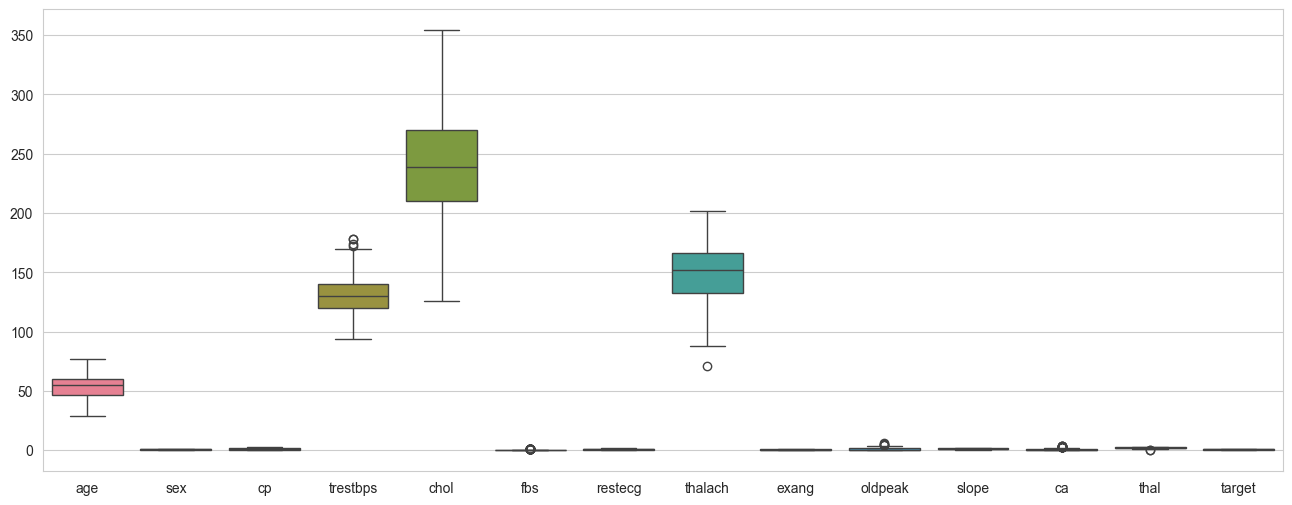

In [22]:
plt.figure(figsize=(16,6))
sns.boxplot(data=hd2)

In [23]:
hd2.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000
mean,54.158076,0.701031,0.969072,130.491409,241.907216,0.144330,0.536082,149.457045,0.323024,1.016151,1.402062,0.714777,2.305842,0.546392
std,9.064278,0.458595,1.035111,16.142761,44.214699,0.352029,0.519851,23.061553,0.468437,1.143368,0.615766,1.005719,0.615266,0.498701
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,210.500000,0.000000,0.000000,132.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,152.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,270.000000,0.000000,1.000000,166.500000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,178.000000,354.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Vamos tratar agora a coluna do thalach pois no minimo esta dando outliers.

In [28]:
hd2['thalach'].quantile(0.005) ## é para ver se tem algum outlier retirando 1% dos dados

88.9

In [29]:
hd3 = hd2[hd2['thalach']>hd2['thalach'].quantile(0.005)]

<Axes: >

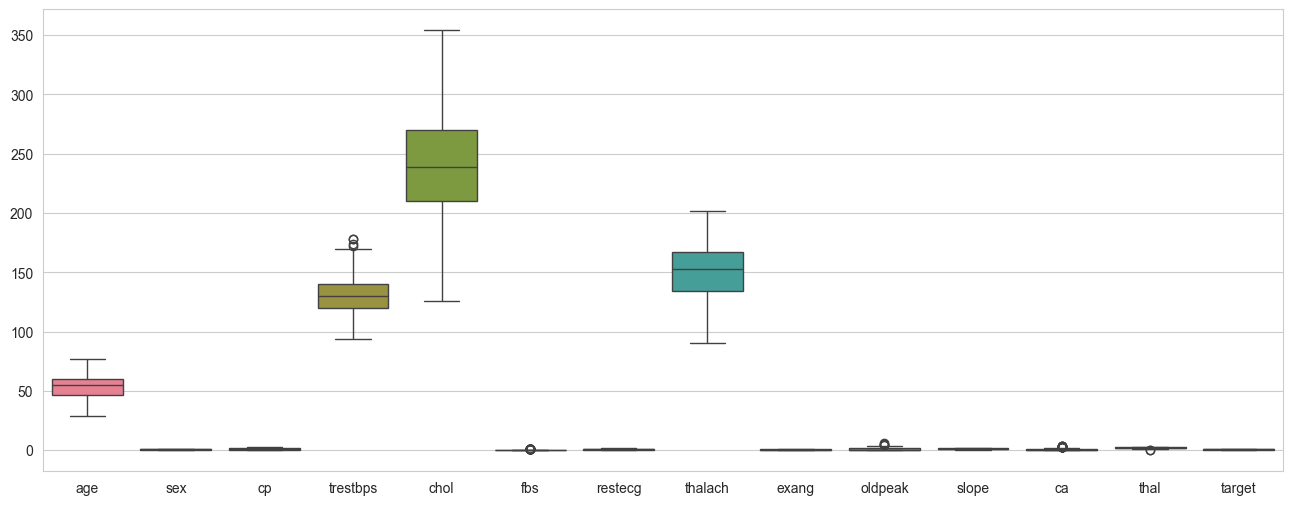

In [30]:
plt.figure(figsize=(16,6))
sns.boxplot(data=hd3)

In [31]:
hd3.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000
mean,54.103806,0.698962,0.975779,130.453287,241.813149,0.145329,0.532872,149.941176,0.321799,1.015571,1.404844,0.716263,2.304498,0.550173
std,9.062454,0.459505,1.035533,16.137174,44.326594,0.353043,0.520209,22.378685,0.467977,1.147279,0.616985,1.008185,0.615777,0.498339
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,90.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,210.000000,0.000000,0.000000,134.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,153.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,270.000000,0.000000,1.000000,167.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,178.000000,354.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Começar a preparar os dados para machine learning

In [32]:
categoricas = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]
numericas = ["age", "trestbps", "chol", "thalach", "oldpeak"]

In [35]:
# hd4 = pd.get_dummies(hd3, columns = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"], drop_first=True) ## drop_first=True para evitar a multicolinearidade, pois se eu tenho 3 colunas, eu só preciso de 2 para saber o valor da terceira
hd4 = pd.get_dummies(hd3, columns = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"])
hd4

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,0,False,True,True,False,...,True,False,False,True,False,False,False,False,False,True
1,53,140,203,155,3.1,0,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
2,70,145,174,125,2.6,0,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
3,61,148,203,161,0.0,0,False,True,True,False,...,True,False,True,False,False,False,False,False,False,True
4,62,138,294,106,1.9,0,True,False,True,False,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,120,211,115,1.5,1,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
733,44,108,141,175,0.6,1,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
739,52,128,255,161,0.0,0,False,True,True,False,...,True,False,True,False,False,False,False,False,False,True
843,59,160,273,125,0.0,0,False,True,False,False,...,True,True,False,False,False,False,False,False,True,False


Fazendo o dummie passamos de 14 colunas para 31, colocamos o drop_fisrt = True e diminui para 23.

In [37]:
hd4.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')

In [39]:
X = hd4.drop('target', axis=1) ## axis=1 é para excluir a coluna inteira
y = hd4['target']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
X_train

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
109,54,110,206,108,0.0,False,True,True,False,False,...,False,False,True,False,False,False,False,False,True,False
74,48,130,256,150,0.0,False,True,True,False,False,...,True,False,False,True,False,False,False,False,False,True
71,61,140,207,138,1.9,False,True,True,False,False,...,True,False,True,False,False,False,False,False,False,True
94,62,128,208,140,0.0,False,True,False,True,False,...,True,True,False,False,False,False,False,False,True,False
26,44,130,233,179,0.4,False,True,False,False,True,...,True,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,64,140,313,133,0.2,True,False,False,False,True,...,True,True,False,False,False,False,False,False,False,True
80,50,140,233,163,0.6,False,True,False,False,True,...,False,False,True,False,False,False,False,False,False,True
129,57,140,192,148,0.4,False,True,True,False,False,...,False,True,False,False,False,False,False,True,False,False
599,63,140,195,179,0.0,True,False,False,True,False,...,True,False,False,True,False,False,False,False,True,False


In [44]:
X_test

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
50,58,150,283,162,1.0,True,False,False,False,False,...,True,True,False,False,False,False,False,False,True,False
220,57,130,236,174,0.0,True,False,False,True,False,...,False,False,True,False,False,False,False,False,True,False
628,69,140,239,151,1.8,True,False,False,False,False,...,True,False,False,True,False,False,False,False,True,False
47,66,178,228,165,1.0,True,False,True,False,False,...,False,False,False,True,False,False,False,False,False,True
271,44,120,263,173,0.0,False,True,False,True,False,...,True,True,False,False,False,False,False,False,False,True
9,54,122,286,116,3.2,False,True,True,False,False,...,False,False,False,True,False,False,False,False,True,False
51,57,140,241,123,0.2,True,False,True,False,False,...,False,True,False,False,False,False,False,False,False,True
252,55,132,353,132,1.2,False,True,True,False,False,...,False,False,True,False,False,False,False,False,False,True
90,54,108,267,167,0.0,True,False,False,False,True,...,True,True,False,False,False,False,False,False,True,False
300,46,105,204,172,0.0,True,False,False,True,False,...,True,True,False,False,False,False,False,False,True,False


Separamos os dados que vão ser para teste e os para treino com a função acima

In [46]:
log = LogisticRegression(max_iter=1000)

In [47]:
log.fit(X_train, y_train) ## treinando o modelo

/home/jullia/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

## Vendo a acurácia

Vamos ver o quanto ele acerta na análise, qunado faz com os dados de treino e analisa nos de teste

In [48]:
log.score(X_train, y_train) ## acurácia do modelo

0.8744588744588745

In [49]:
log.score(X_test, y_test) ## acurácia do modelo

0.8448275862068966

Esperamos que a acurácia dos dados de treino seja maior do que o de teste.

In [50]:
y_previsto = log.predict(X_test)
y_previsto

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0])

Podemos comparar a nossa previsão com o valor do log score do teste

In [51]:
accuracy_score(y_test, y_previsto) ## isso vai ver se o modelo acertou ou não, se o y_test for igual ao y_previsto, ele vai dar 1, se não, ele vai dar 0

0.8448275862068966

In [52]:
print(classification_report(y_test, y_previsto))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80        24
           1       0.84      0.91      0.87        34

    accuracy                           0.84        58
   macro avg       0.85      0.83      0.84        58
weighted avg       0.85      0.84      0.84        58



In [53]:
confusion_matrix(y_test, y_previsto)

array([[18,  6],
       [ 3, 31]])

## Fazendo uma função para conseguir jogar para qualquer dataframe

In [54]:
def relatorio_ml(df, algoritmo, opt=2 ):
    X = df.drop('target', axis=1)
    y = df['target']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    if opt == 0: # modelos de ML que usa max_inter(1000), que serve para definir o número máximo de iterações
        ml = algoritmo(max_iter=1000)
    elif opt ==1: # modelos de ML que usa n_estimators(1000), que serve para definir o número de árvores
        ml = algoritmo(n_estimators=1000)
    elif opt == 2: # modelos de ML que não precisa de max_inter ou n_estimators
        ml = algoritmo()
        
    ml.fit(X_train, y_train)
    score_train = ml.score(X_train, y_train)
    print(f"Acurácia do modelo no treino: {score_train*100:.2f}%")
    score_test = ml.score(X_test, y_test)
    print(f"Acurácia do modelo no teste: {score_test*100:.2f}%")

    y_previsto = ml.predict(X_test)
    print("--- CLASSIFICATION REPORT ---")
    print(classification_report(y_test, y_previsto))
    print("--- CONFUSION MATRIX ---")
    # print(confusion_matrix(y_test, y_previsto))
    confusao = confusion_matrix(y_test, y_previsto)
    sns.heatmap(confusao, annot=True, cmap='coolwarm', fmt='d', linewidths=2)

    return score_train, score_test

/home/jullia/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Acurácia do modelo no treino: 87.45%
Acurácia do modelo no teste: 84.48%
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        24
           1       0.84      0.91      0.87        34

    accuracy                           0.84        58
   macro avg       0.85      0.83      0.84        58
weighted avg       0.85      0.84      0.84        58

--- CONFUSION MATRIX ---


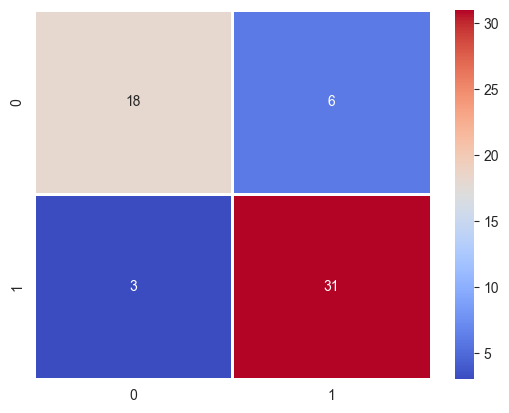

In [55]:
log_train, log_test = relatorio_ml(hd4, LogisticRegression, 0)

Acurácia do modelo no treino: 100.00%
Acurácia do modelo no teste: 72.41%
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.67      0.67      0.67        24
           1       0.76      0.76      0.76        34

    accuracy                           0.72        58
   macro avg       0.72      0.72      0.72        58
weighted avg       0.72      0.72      0.72        58

--- CONFUSION MATRIX ---


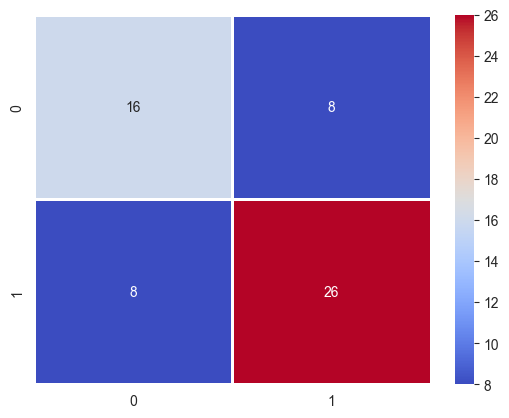

In [56]:
tree_train, tree_test = relatorio_ml(hd4, DecisionTreeClassifier)

Acurácia do modelo no treino: 100.00%
Acurácia do modelo no teste: 79.31%
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.80      0.67      0.73        24
           1       0.79      0.88      0.83        34

    accuracy                           0.79        58
   macro avg       0.79      0.77      0.78        58
weighted avg       0.79      0.79      0.79        58

--- CONFUSION MATRIX ---


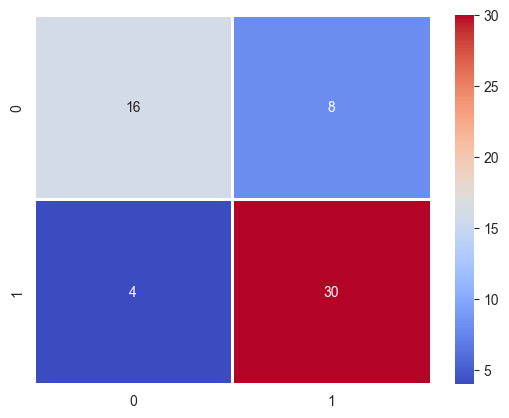

In [57]:
ada_train, ada_test = relatorio_ml(hd4, RandomForestClassifier, 1)

Acurácia do modelo no treino: 77.06%
Acurácia do modelo no teste: 60.34%
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.52      0.54      0.53        24
           1       0.67      0.65      0.66        34

    accuracy                           0.60        58
   macro avg       0.59      0.59      0.59        58
weighted avg       0.61      0.60      0.60        58

--- CONFUSION MATRIX ---


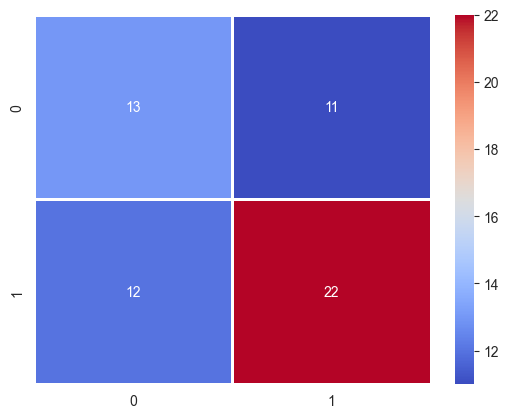

In [58]:
kn_train, kn_test = relatorio_ml(hd4, KNeighborsClassifier)

Acurácia do modelo no treino: 100.00%
Acurácia do modelo no teste: 81.03%
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.81      0.71      0.76        24
           1       0.81      0.88      0.85        34

    accuracy                           0.81        58
   macro avg       0.81      0.80      0.80        58
weighted avg       0.81      0.81      0.81        58

--- CONFUSION MATRIX ---


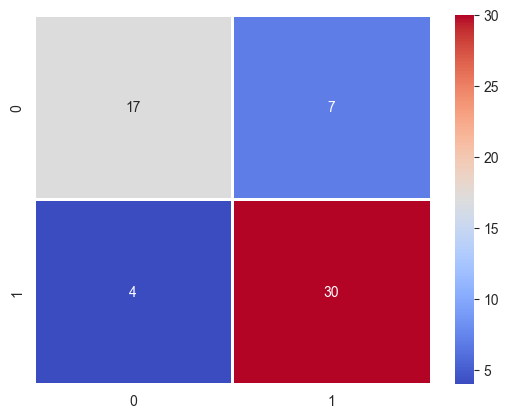

In [61]:
# rand_train, rand_test = relatorio_ml(hd4, RandomForestClassifier, 1)
rand_train, rand_test = relatorio_ml(hd4, RandomForestClassifier)

In [62]:
data = {'Models': ['Logistic Regression', 'Decision Tree', 'KNeighbors', 'Random Forest Classifier', 'Ada Boost'],
        'Acurácia Treino' : [round(log_train * 100, 2), round(tree_train * 100, 2), 
                             round(kn_train * 100, 2), round(rand_train * 100, 2), 
                             round(ada_train * 100, 2)],
        'Acurácia Teste' : [round(log_test * 100, 2), round(tree_test * 100, 2), 
                            round(kn_test * 100, 2), round(rand_test * 100, 2), 
                            round(ada_test * 100, 2)],
        }

df = pd.DataFrame(data)
df.sort_values(by='Acurácia Teste', ascending=False, inplace=True)  
df

,Models,Acurácia Treino,Acurácia Teste
0,Logistic Regression,87.45,84.48
3,Random Forest Classifier,100.00,81.03
4,Ada Boost,100.00,79.31
1,Decision Tree,100.00,72.41
2,KNeighbors,77.06,60.34


In [70]:
def relatorio_ml_scaler(df, algoritmo, opt=2 ):
    X = df.drop('target', axis=1)
    y = df['target']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    scaler = StandardScaler()
    cols_scaler = ["age", "trestbps", "chol", "thalach", "oldpeak"]
    X_train[cols_scaler] = scaler.fit_transform(X_train[cols_scaler]) ## fit_transform é para treinar o modelo e transformar os dados, isso é para evitar que uma coluna tenha mais peso que a outra ai o dado que antes era 0, agora é 1
    X_test[cols_scaler] = scaler.transform(X_test[cols_scaler]) ## transform é para transformar os dados
   
    if opt == 0: # modelos de ML que usa max_inter(1000), que serve para definir o número máximo de iterações
        ml = algoritmo(max_iter=1000)
    elif opt ==1: # modelos de ML que usa n_estimators(1000), que serve para definir o número de árvores
        ml = algoritmo(n_estimators=1000)
    elif opt == 2: # modelos de ML que não precisa de max_inter ou n_estimators
        ml = algoritmo()
        
    ml.fit(X_train, y_train)
    score_train = ml.score(X_train, y_train)
    print(f"Acurácia do modelo no treino: {score_train*100:.2f}%")
    score_test = ml.score(X_test, y_test)
    print(f"Acurácia do modelo no teste: {score_test*100:.2f}%")

    y_previsto = ml.predict(X_test)
    print("--- CLASSIFICATION REPORT ---")
    print(classification_report(y_test, y_previsto))
    print("--- CONFUSION MATRIX ---")
    # print(confusion_matrix(y_test, y_previsto))
    confusao = confusion_matrix(y_test, y_previsto)
    sns.heatmap(confusao, annot=True, cmap='coolwarm', fmt='d', linewidths=2)

    return score_train, score_test

Acurácia do modelo no treino: 87.45%
Acurácia do modelo no teste: 84.48%
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        24
           1       0.84      0.91      0.87        34

    accuracy                           0.84        58
   macro avg       0.85      0.83      0.84        58
weighted avg       0.85      0.84      0.84        58

--- CONFUSION MATRIX ---


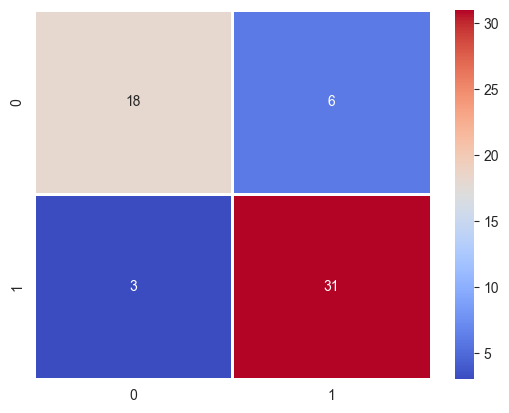

In [71]:
log_train_scaler, log_test_scaler = relatorio_ml_scaler(hd4, LogisticRegression, 0)

Acurácia do modelo no treino: 100.00%
Acurácia do modelo no teste: 70.69%
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.63      0.71      0.67        24
           1       0.77      0.71      0.74        34

    accuracy                           0.71        58
   macro avg       0.70      0.71      0.70        58
weighted avg       0.71      0.71      0.71        58

--- CONFUSION MATRIX ---


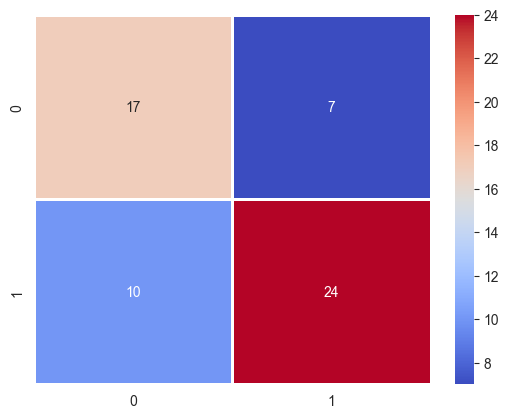

In [72]:
tree_train_scaler, tree_test_scaler = relatorio_ml_scaler(hd4, DecisionTreeClassifier)

Acurácia do modelo no treino: 100.00%
Acurácia do modelo no teste: 81.03%
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.81      0.71      0.76        24
           1       0.81      0.88      0.85        34

    accuracy                           0.81        58
   macro avg       0.81      0.80      0.80        58
weighted avg       0.81      0.81      0.81        58

--- CONFUSION MATRIX ---


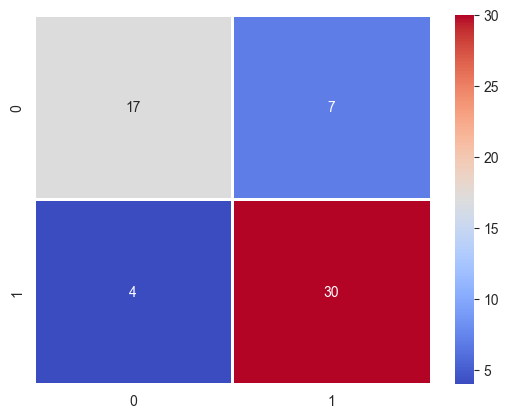

In [73]:
ada_train_scaler, ada_test_scaler = relatorio_ml_scaler(hd4, RandomForestClassifier, 1)

Acurácia do modelo no treino: 87.45%
Acurácia do modelo no teste: 79.31%
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.77      0.71      0.74        24
           1       0.81      0.85      0.83        34

    accuracy                           0.79        58
   macro avg       0.79      0.78      0.78        58
weighted avg       0.79      0.79      0.79        58

--- CONFUSION MATRIX ---


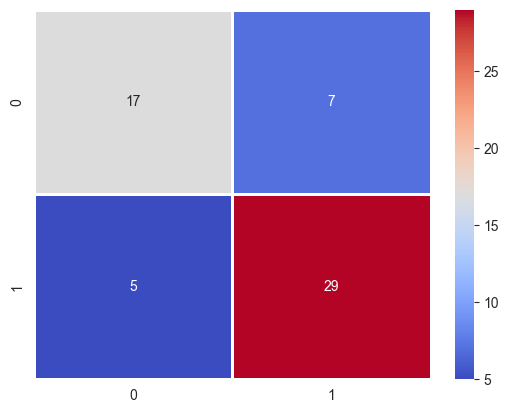

In [74]:
kn_test_scaler, kn_train_scaler = relatorio_ml_scaler(hd4, KNeighborsClassifier)

Acurácia do modelo no treino: 100.00%
Acurácia do modelo no teste: 79.31%
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.80      0.67      0.73        24
           1       0.79      0.88      0.83        34

    accuracy                           0.79        58
   macro avg       0.79      0.77      0.78        58
weighted avg       0.79      0.79      0.79        58

--- CONFUSION MATRIX ---


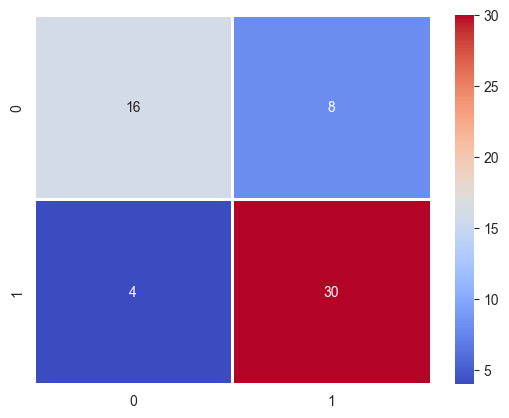

In [75]:
rand_train_scaler, rand_test_scaler = relatorio_ml_scaler(hd4, RandomForestClassifier)

In [78]:
data = {'Models': ['Logistic Regression', 'Decision Tree', 'KNeighbors', 'Random Forest Classifier', 'Ada Boost'],
        'Acurácia Treino' : [round(log_train_scaler * 100, 2), round(tree_train_scaler * 100, 2), 
                             round(kn_train_scaler * 100, 2), round(rand_train_scaler * 100, 2), 
                             round(ada_train_scaler * 100, 2)],
        'Acurácia Teste' : [round(log_test_scaler * 100, 2), round(tree_test_scaler * 100, 2), 
                            round(kn_test_scaler * 100, 2), round(rand_test_scaler * 100, 2), 
                            round(ada_test_scaler * 100, 2)],
        }

df_scaler = pd.DataFrame(data)
df_scaler.sort_values(by='Acurácia Teste', ascending=False, inplace=True)  
df_scaler

,Models,Acurácia Treino,Acurácia Teste
2,KNeighbors,79.31,87.45
0,Logistic Regression,87.45,84.48
4,Ada Boost,100.00,81.03
3,Random Forest Classifier,100.00,79.31
1,Decision Tree,100.00,70.69


## Links usados:

- https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

- https://towardsdatascience.com/2-types-of-duplicate-features-in-machine-learning-2931de6c949b

- https://www.deepchecks.com/what-is-data-cleaning/

- https://sigmoidal.ai/guia-basico-de-pre-processamento-de-dados/#:~:text=Standard%20Scaler&text=Na%20documenta%C3%A7%C3%A3o%2C%20eles%20explicam,mais%20manej%C3%A1veis%20para%20nossos%20modelos

- https://acervolima.com/tecnicas-standardscaler-minmaxscaler-e-robustscaler-ml/

- https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/